# Worksheet 6

*   *Name: Ragendra Maharjan*
*   *University ID: 2329812*


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


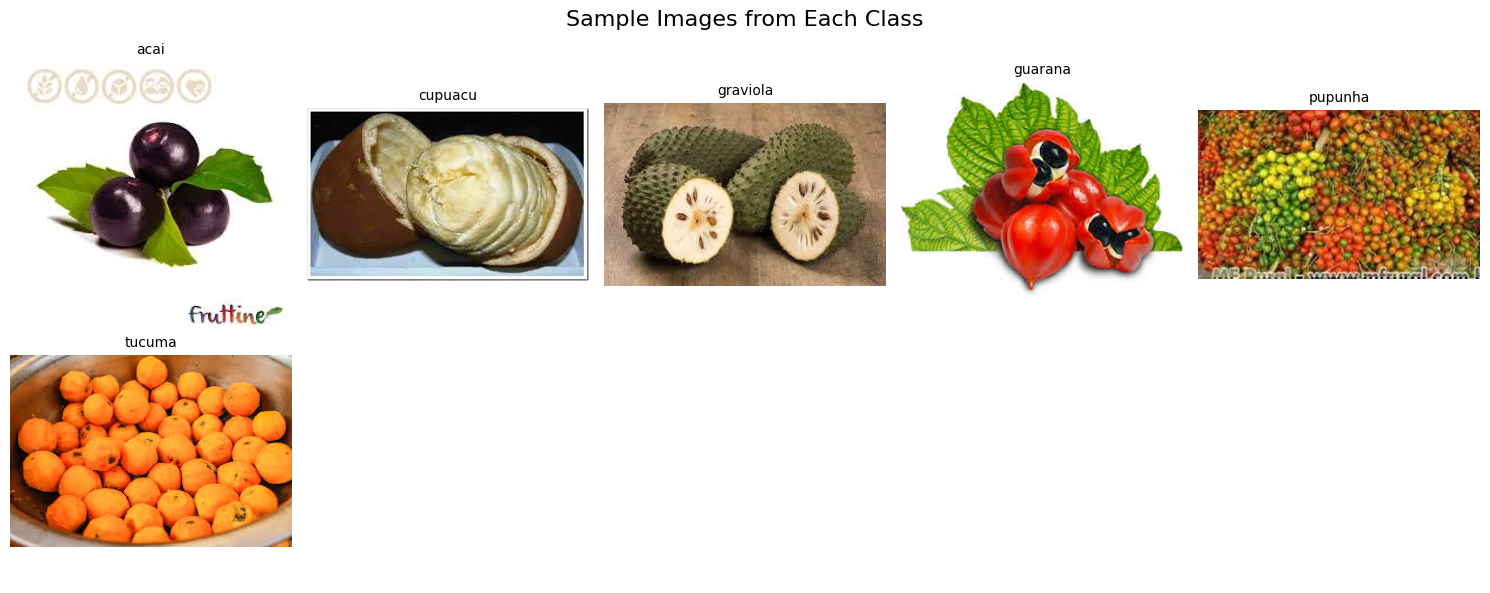

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/AI&ML/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


In [3]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/AI&ML/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [4]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Ragendra Maharjan.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 1.0000 - loss: 0.0066
Epoch 1: val_loss improved from inf to 0.46960, saving model to Ragendra Maharjan.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 758ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.8333 - val_loss: 0.4696
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 1.0000 - loss: 0.0051
Epoch 2: val_loss did not improve from 0.46960
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 452ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.8333 - val_loss: 0.4717
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 1.0000 - loss: 0.0045
Epoch 3: val_loss improved from 0.46960 to 0.43784, saving model to Ragendra Maharjan.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 580ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.8333 - val_loss: 0.4378
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 4: val_loss improved from 0.43784 to 0.43589, saving model to Ragendra Maharjan.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 513ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.8333 - val_loss: 0.4359
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 1.0000 - loss: 0.0034
Epoch 5: val_loss did not improve from 0.43589
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 837ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8333 - val_loss: 0.4535
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 1.0000 - loss: 0.0029
Epoch 6: val_loss did not improve from 0.43589
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 779ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.8333 - val_loss: 0.4685
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 1.0000 - loss: 0.0027
Epoch 7: val_loss did not improve from 0.43589
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 556ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.8333 - val_loss: 0.4637
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 1.0000 - loss: 0.0020
Epoch 8: val_loss did not improve from 0.43589
3/3 ━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 837ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8333 - val_loss: 0.4273
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 1.0000 - loss: 0.0013
Epoch 12: val_loss improved from 0.42732 to 0.42644, saving model to Ragendra Maharjan.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 585ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8333 - val_loss: 0.4264
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 1.0000 - loss: 9.5861e-04
Epoch 13: val_loss did not improve from 0.42644
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step - accuracy: 1.0000 - loss: 9.6561e-04 - val_accuracy: 0.8333 - val_loss: 0.4419
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 1.0000 - loss: 9.3035e-04
Epoch 14: val_loss did not improve from 0.42644
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - accuracy: 1.0000 - loss: 9.2237e-04 - val_accuracy: 0.8333 - val_loss: 0.4513
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 1.0000 - loss: 7.4528e-04
Epoch 15: val_loss did not improve from 0.42644
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 633ms/step - accuracy: 1.0000 - loss: 7.4501e-04 - val_accuracy: 0.8333 - val_loss: 0.4458
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 1.0000 - loss: 6.2942e-04
Epoch 16: val_loss did n

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 589ms/step - accuracy: 1.0000 - loss: 5.6103e-04 - val_accuracy: 0.8333 - val_loss: 0.4244
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 1.0000 - loss: 4.7341e-04
Epoch 18: val_loss did not improve from 0.42439
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 496ms/step - accuracy: 1.0000 - loss: 4.7457e-04 - val_accuracy: 0.8333 - val_loss: 0.4329
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 1.0000 - loss: 3.8415e-04
Epoch 19: val_loss did not improve from 0.42439
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 536ms/step - accuracy: 1.0000 - loss: 3.9107e-04 - val_accuracy: 0.8333 - val_loss: 0.4392
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 1.0000 - loss: 3.5213e-04
Epoch 20: val_loss did not improve from 0.42439
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 656ms/step - accuracy: 1.0000 - loss: 3.5439e-04 - val_accuracy: 0.8333 - val_loss: 0.4415
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - accuracy: 1.0000 - loss: 3.1690e-04
Epoch 21: val_loss d

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 524ms/step - accuracy: 1.0000 - loss: 2.5523e-04 - val_accuracy: 0.8333 - val_loss: 0.4244
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 1.0000 - loss: 2.2358e-04
Epoch 24: val_loss did not improve from 0.42436
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - accuracy: 1.0000 - loss: 2.2439e-04 - val_accuracy: 0.8333 - val_loss: 0.4261
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 1.0000 - loss: 2.1281e-04
Epoch 25: val_loss improved from 0.42436 to 0.42118, saving model to Ragendra Maharjan.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 815ms/step - accuracy: 1.0000 - loss: 2.1099e-04 - val_accuracy: 0.8333 - val_loss: 0.4212
Epoch 26/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 781ms/step - accuracy: 1.0000 - loss: 1.9043e-04
Epoch 26: val_loss improved from 0.42118 to 0.41527, saving model to Ragendra Maharjan.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 1.8913e-04 - val_accuracy: 0.8333 - val_loss: 0.4153
Epoch 27/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 1.0000 - loss: 1.6895e-04
Epoch 27: val_loss did not improve from 0.41527
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 536ms/step - accuracy: 1.0000 - loss: 1.6861e-04 - val_accuracy: 0.8333 - val_loss: 0.4154
Epoch 28/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 1.0000 - loss: 1.6472e-04
Epoch 28: val_loss did not improve from 0.41527
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 546ms/step - accuracy: 1.0000 - loss: 1.6220e-04 - val_accuracy: 0.8333 - val_loss: 0.4173
Epoch 29/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 1.0000 - loss: 1.4806e-04
Epoch 29: val_loss did not improve from 0.41527
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 466ms/step - accuracy: 1.0000 - loss: 1.4695e-04 - val_accuracy: 0.8333 - val_loss: 0.4231
Epoch 30/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 1.0000 - loss: 1.3320e-04
Epoch 30: val_loss did 

In [10]:
test_dir = '/content/drive/MyDrive/AI&ML/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7000 - loss: 281.5819
Test Loss: 281.5819396972656
Test Accuracy: 0.699999988079071


In [11]:

model.save('ragendra_maharjan_model.h5')
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.42      1.00      0.59         5
           2       1.00      0.80      0.89         5
           3       0.80      0.80      0.80         5
           4       1.00      0.60      0.75         5
           5       1.00      0.40      0.57         5

    accuracy                           0.70        30
   macro avg       0.83      0.70      0.71        30
weighted avg       0.83      0.70      0.71        30

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 1.0000 - loss: 9.0197e-05
Epoch 1: val_loss did not improve from 0.41527
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 830ms/step - accuracy: 1.0000 - loss: 9.1578e-05 - val_accuracy: 0.8333 - val_loss: 0.4184
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 1.0000 - loss: 8.6740e-05
Epoch 2: val_loss did not improve from 0.41527
3/3 

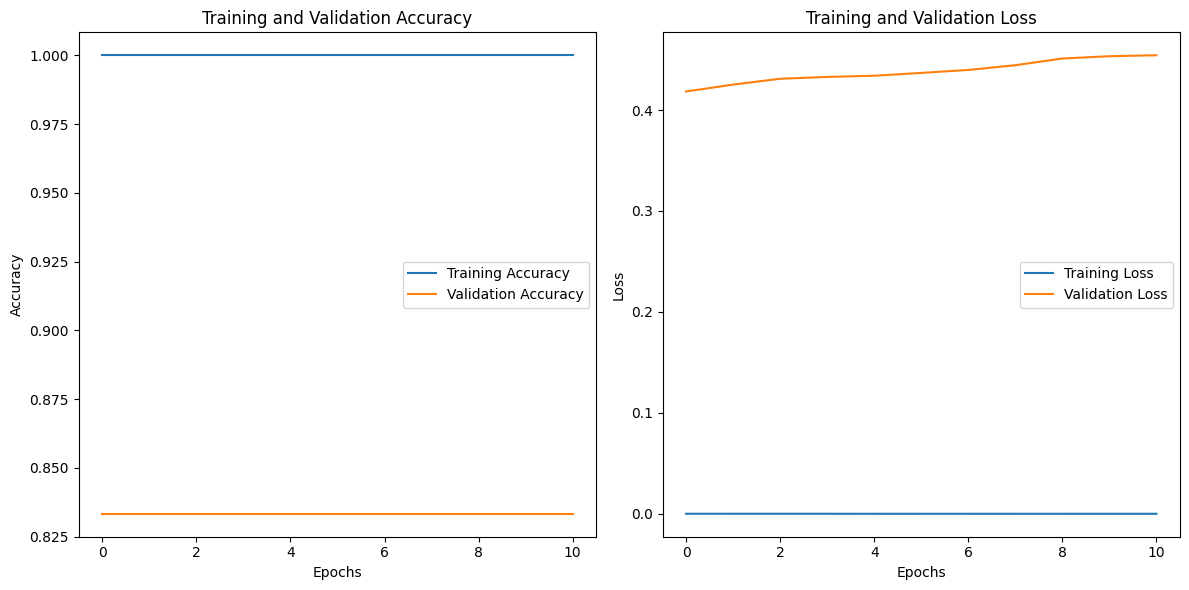

Model saved as 'ragendra_maharjan_model.h5'


In [13]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('ragendra_maharjan__model.h5')
print("Model saved as 'ragendra_maharjan_model.h5'")


## Task 1: Improved Model with Data Augmentation, Batch Normalization, and Dropout

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI&ML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI&ML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI&ML/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI&ML/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Fit model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,822 (6.21 MB)

 Trainable params: 1,626,374 (6.20 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.2182 - loss: 3.0786 - val_accuracy: 0.2222 - val_loss: 1.7734
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5929 - loss: 1.3315 - val_accuracy: 0.2778 - val_loss: 1.6859
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5395 - loss: 1.7974 - val_accuracy: 0.2556 - val_loss: 1.6993
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 593ms/step - accuracy: 0.4861 - loss: 1.6944 - val_accuracy: 0.2111 - val_loss: 1.7910
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 624ms/step - accuracy: 0.5819 - loss: 1.2151 - val_accuracy: 0.1889 - val_loss: 1.8830
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 555ms/step - accuracy: 0.5874 - loss: 1.5022 - val_accuracy: 0.1667 - val_loss: 1.9295
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 569ms/step - accuracy: 0.6220 - loss: 1.3008 - val_accuracy: 0.1667 - val_loss: 1.9979
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 575ms/step - accuracy: 0.6435 - loss: 1.1186 - val_accuracy: 0.1667 - val_loss: 2.1382
E

## Task 2: Transfer Learning using VGG16

In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

train_generator_vgg = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI&ML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator_vgg = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI&ML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Train the model
history_vgg = model.fit(train_generator_vgg, epochs=5, validation_data=val_generator_vgg)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,246,150 (58.16 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 119s 50s/step - accuracy: 0.0908 - loss: 1.9792 - val_accuracy: 0.4111 - val_loss: 1.6520
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 139s 47s/step - accuracy: 0.3597 - loss: 1.6681 - val_accuracy: 0.3444 - val_loss: 1.4707
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 116s 47s/step - accuracy: 0.3777 - loss: 1.4568 - val_accuracy: 0.5778 - val_loss: 1.2861
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 140s 47s/step - accuracy: 0.5781 - loss: 1.3771 - val_accuracy: 0.7556 - val_loss: 1.1655
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 124s 52s/step - accuracy: 0.6468 - loss: 1.2938 - val_accuracy: 0.7000 - val_loss: 1.0290


In [17]:
#Report
import numpy as np
from sklearn.metrics import classification_report


Y_pred = model.predict(val_generator_vgg)
y_pred = np.argmax(Y_pred, axis=1)
print("Classification Report:")
print(classification_report(val_generator_vgg.classes, y_pred, target_names=list(val_generator_vgg.class_indices.keys())))


3/3 ━━━━━━━━━━━━━━━━━━━━ 58s 18s/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.25      0.13      0.17        15
     cupuacu       0.35      0.53      0.42        15
    graviola       0.12      0.13      0.12        15
     guarana       0.26      0.47      0.33        15
     pupunha       0.17      0.07      0.10        15
      tucuma       0.11      0.07      0.08        15

    accuracy                           0.23        90
   macro avg       0.21      0.23      0.21        90
weighted avg       0.21      0.23      0.21        90

